### 1. Setup environment to access and download latest stock data

In [1]:
## Import Libraries
import pandas as pd
import pandas_datareader.data as web
import datetime

In [2]:
# Define dataset start and end date 
# so that the dataset include the past 60 months from today's date
from datetime import date
end = date.today()
from dateutil.relativedelta import relativedelta
start = date.today() + relativedelta(months=-60)

### 2. Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months.

In [3]:
# download multiple stocks into a single dataframe
all_stocks_list = ['AMZN', 'FB','IBM','MMM']
all_stocks = web.DataReader(all_stocks_list,'yahoo',start,end)
all_stocks.columns

MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close',   'FB'),
            ('Adj Close',  'IBM'),
            ('Adj Close',  'MMM'),
            (    'Close', 'AMZN'),
            (    'Close',   'FB'),
            (    'Close',  'IBM'),
            (    'Close',  'MMM'),
            (     'High', 'AMZN'),
            (     'High',   'FB'),
            (     'High',  'IBM'),
            (     'High',  'MMM'),
            (      'Low', 'AMZN'),
            (      'Low',   'FB'),
            (      'Low',  'IBM'),
            (      'Low',  'MMM'),
            (     'Open', 'AMZN'),
            (     'Open',   'FB'),
            (     'Open',  'IBM'),
            (     'Open',  'MMM'),
            (   'Volume', 'AMZN'),
            (   'Volume',   'FB'),
            (   'Volume',  'IBM'),
            (   'Volume',  'MMM')],
           names=['Attributes', 'Symbols'])

In [4]:
#Define Adjusted Close Price sub dataset by selecting "Adj Close" columns
Adjust_Price=all_stocks['Adj Close']
Adjust_Price.head()

Symbols,AMZN,FB,IBM,MMM
Date,,,,
2016-03-28,579.869995,113.690002,119.002792,143.614777
2016-03-29,593.859985,116.139999,119.748558,141.982361
2016-03-30,598.690002,114.699997,119.010818,144.020706
2016-03-31,593.640015,114.099998,121.448616,143.917099
2016-04-01,598.500000,116.059998,122.306641,144.694427


### 3.Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

In [5]:
# Resample data to get Business Month End Date Adjusted Close Price
BM_AdjPrice=Adjust_Price.resample('BM').last()
BM_AdjPrice.head()

Symbols,AMZN,FB,IBM,MMM
Date,,,,
2016-03-31,593.640015,114.099998,121.448616,143.917099
2016-04-29,659.590027,117.580002,117.030098,144.564835
2016-05-31,722.789978,118.809998,124.474747,146.344696
2016-06-30,715.619995,114.279999,122.887802,152.256943
2016-07-29,758.809998,123.940002,130.045120,155.073929


### 4. Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Lag (Business Months)')

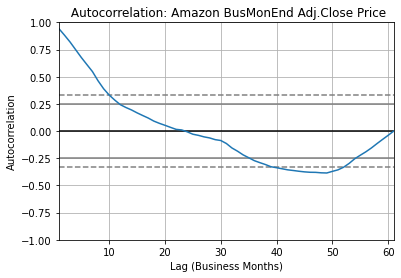

In [7]:
# Run autocorrelation of the Business Month-end adjusted close prices 
## AMZN: Amazon
AmznBM=pd.plotting.autocorrelation_plot(BM_AdjPrice['AMZN'])
AmznBM.set_title(' Autocorrelation: Amazon BusMonEnd Adj.Close Price')
AmznBM.set_xlabel('Lag (Business Months)')

Amazon Stock shows statistically significant positive autocorrlelation with recent 10 months; within the 10 months period, the closer to today, the stronger the price is correlated.
Also, it shows slightly but statistically significant negative autocorrlelation with the Business Month end Adjusted close price 40-52 months prior.

Text(0.5, 0, 'Lag (Business Months)')

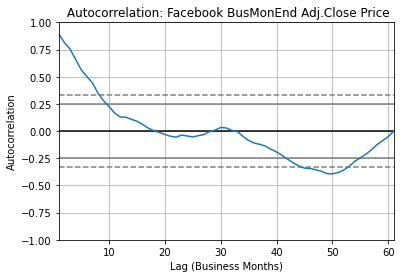

In [8]:
## FB: Facebook
FBBM=pd.plotting.autocorrelation_plot(BM_AdjPrice['FB'])
FBBM.set_title(' Autocorrelation: Facebook BusMonEnd Adj.Close Price')
FBBM.set_xlabel('Lag (Business Months)')

Facebook Stock shows statistically significant positive autocorrlelation with recent 8 months; within the 8 months, the closer to today, the stronger the price is correlated.
Also, it shows slightly but statistically significant negative autocorrlelation with the Business Month end Adjusted close price 44-53 months prior.

Text(0.5, 0, 'Lag (Business Months)')

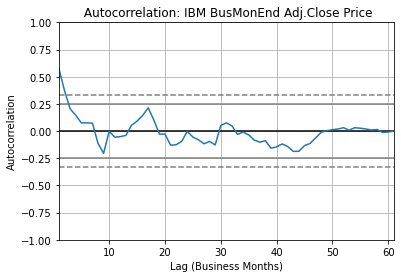

In [9]:
## IBM
IBMBM=pd.plotting.autocorrelation_plot(BM_AdjPrice['IBM'])
IBMBM.set_title(' Autocorrelation: IBM BusMonEnd Adj.Close Price')
IBMBM.set_xlabel('Lag (Business Months)')

IBM Stock price only shows slightly but statistically significant positive autocorrlelation with recent month.within the month, the closer to today, the prices are higher correlated.

Text(0.5, 0, 'Lag (Business Months)')

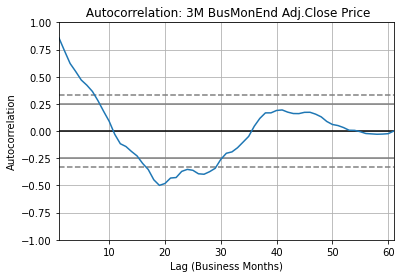

In [10]:
## MMM: 3M
MMMBM=pd.plotting.autocorrelation_plot(BM_AdjPrice['MMM'])
MMMBM.set_title(' Autocorrelation: 3M BusMonEnd Adj.Close Price')
MMMBM.set_xlabel('Lag (Business Months)')

3M Stock shows statistically significant positive autocorrlelation with recent 7 months; within the 7 months, the closer to today, the stronger the autocorrelation.
Also, it shows slightly but statistically significant negative autocorrlelation with the Business Month end Adjusted close price 17-29 months prior.

### 5. Calculate the monthly returns for each stock using `shift()` function and use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns

In [11]:
#Create Previous Month Dataset using shift
CurMonth=BM_AdjPrice
CurMonth.columns=['AMZN_Cur','FB_Cur','IBM_Cur','MMM_Cur']
PrevMonth=BM_AdjPrice.shift(periods=1)
PrevMonth.columns=['AMZN_Prev','FB_Prev','IBM_Prev','MMM_Prev']
JoinCurPrev=CurMonth.merge(PrevMonth,left_index=True, right_index=True,how='left')
#Drop the NAN record
JoinCurPrevDrop=JoinCurPrev.dropna(axis=0, how='any', thresh=None, inplace=False)

In [12]:
import sys
import warnings
warnings.filterwarnings("ignore") 

In [13]:
#Calculate monthly returns
#monthly returns=(closing price last day this month - closing price last day last month) / closing price last day last month
JoinCurPrevDrop['AMZN']=(JoinCurPrevDrop['AMZN_Cur']-JoinCurPrevDrop['AMZN_Prev'])/JoinCurPrevDrop['AMZN_Prev']
JoinCurPrevDrop['FB']=(JoinCurPrevDrop['FB_Cur']-JoinCurPrevDrop['FB_Prev'])/JoinCurPrevDrop['FB_Prev']
JoinCurPrevDrop['IBM']=(JoinCurPrevDrop['IBM_Cur']-JoinCurPrevDrop['IBM_Prev'])/JoinCurPrevDrop['IBM_Prev']
JoinCurPrevDrop['MMM']=(JoinCurPrevDrop['MMM_Cur']-JoinCurPrevDrop['MMM_Prev'])/JoinCurPrevDrop['MMM_Prev']

In [14]:
MonthReturn=JoinCurPrevDrop[['AMZN','FB','IBM','MMM']]
MonthReturn.head()

,AMZN,FB,IBM,MMM
Date,,,,
2016-04-29,0.111094,0.030500,-0.036382,0.004501
2016-05-31,0.095817,0.010461,0.063613,0.012312
2016-06-30,-0.009920,-0.038128,-0.012749,0.040399
2016-07-29,0.060353,0.084529,0.058243,0.018502
2016-08-31,0.013640,0.017589,-0.002290,0.011196


Text(0.5, 0, 'Lag (Business Months)')

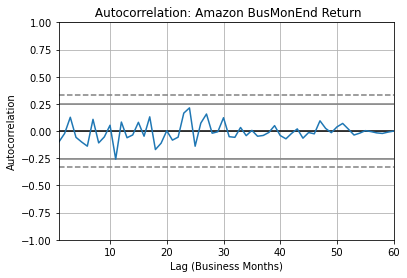

In [15]:
# Run autocorrelation of the Business Month-end returns 
## AMZN: Amazon
AmznRt=pd.plotting.autocorrelation_plot(MonthReturn['AMZN'])
AmznRt.set_title(' Autocorrelation: Amazon BusMonEnd Return')
AmznRt.set_xlabel('Lag (Business Months)')

Amazon stock month return is not autocorrelated with itself, indicateing that we cannot use the historical month return to predict its current/future return. 

Text(0.5, 0, 'Lag (Business Months)')

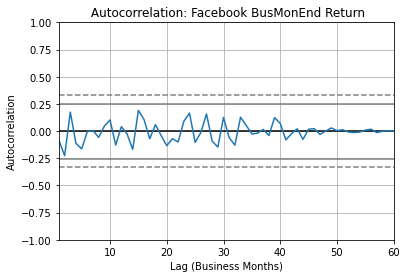

In [16]:
## FB: Facebook
FBRt=pd.plotting.autocorrelation_plot(MonthReturn['FB'])
FBRt.set_title(' Autocorrelation: Facebook BusMonEnd Return')
FBRt.set_xlabel('Lag (Business Months)')

Facebook stock month return is not autocorrelated with itself, indicateing that we cannot use the historical month return to predict its current/future return.

Text(0.5, 0, 'Lag (Business Months)')

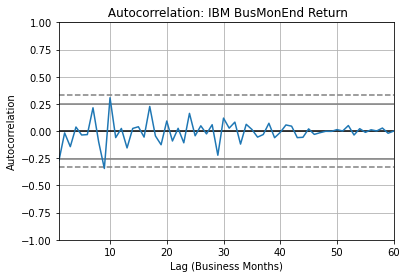

In [17]:
## IBM
IBMRt=pd.plotting.autocorrelation_plot(MonthReturn['IBM'])
IBMRt.set_title(' Autocorrelation: IBM BusMonEnd Return')
IBMRt.set_xlabel('Lag (Business Months)')

IBM Stock only shows slightly but statistically significant negitive autocorrlelation with 9 month prior and positive autocorrlelation with 10 month prior; need further investigation to judge if those two observation randomly happen or there is a rational behind it. We cannot make the conclusion that IBM return can be predicted using historical return by using only two and relative weak observations.

Text(0.5, 0, 'Lag (Business Months)')

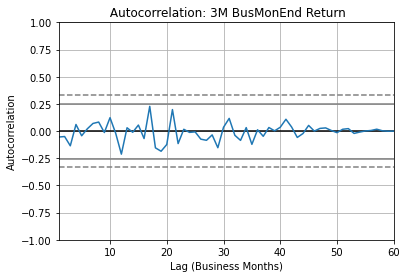

In [18]:
## MMM: 3M
MMMRt=pd.plotting.autocorrelation_plot(MonthReturn['MMM'])
MMMRt.set_title(' Autocorrelation: 3M BusMonEnd Return')
MMMRt.set_xlabel('Lag (Business Months)')

3M stock month return is not autocorrelated with itself, indicateing that we cannot use the historical month return to predict its current/future return.

### 6.Visualize the correlation between the returns and explain the results.

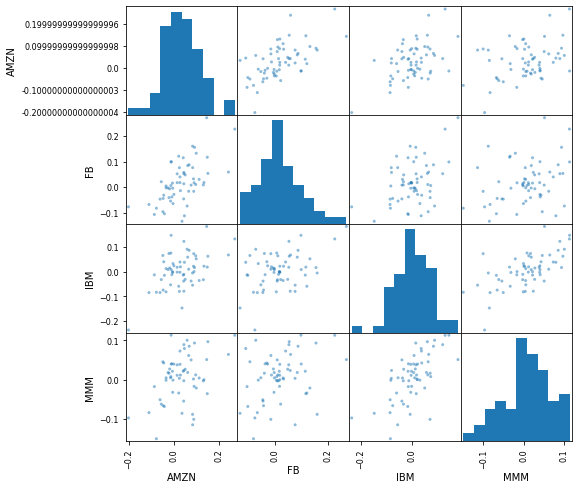

In [19]:
pd.plotting.scatter_matrix(MonthReturn, alpha=0.5, figsize=(8, 8), ax=None, grid=False);

From the scatter plot matrix, we can observe relatively strong positive correlation between Amazon & Facebook and IBM & 3M. 
For futher understand, we need get exact correlation coefficient. 

In [20]:
MonthReturn.corr()

,AMZN,FB,IBM,MMM
AMZN,1.000000,0.602412,0.502394,0.382339
FB,0.602412,1.000000,0.426277,0.316674
IBM,0.502394,0.426277,1.000000,0.648710
MMM,0.382339,0.316674,0.648710,1.000000


If we define the following standard:
1. When correlation is equal/above 0.7 or equal/below -0.7, then we say it is a strong correlation
2. When correlation is equal/above 0.4 and smaller than 0.7 or equal/below -0.4 and larger than -0.7, then we say it is a moderate correlation
3. When correlation is below 0.4 and larger than -0.4, then we say it is a weak correlation

Based on standard above, all stocks are positive correlated with different extends, specifically: 
1. Amazon has moderate positive correlation with Facebook and IBM but weak positive correlation with 3M
2. Facebook has moderate positive correlation with IBM but also, weak positive correlation with 3M
3. IBM has moderate positive correlation with 3M